In [ ]:
                                                     #REGRESSION PROJECT ( HOUSING PRICE PREDICTION DATA )

In [ ]:
#Step1 : Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Step2 : Load Dataset

df=pd.read_csv("/content/Housing Price Prediction Data.zip")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
#Step3 : Display Basic Info

df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
df.dtypes

,0
SquareFeet,int64
Bedrooms,int64
Bathrooms,int64
Neighborhood,object
YearBuilt,int64
Price,float64


In [ ]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [ ]:
df.shape

(50000, 6)

In [ ]:
print("Number of columns:",df.shape[1])
print("Number of rows:",df.shape[0])

Number of columns: 6
Number of rows: 50000


In [ ]:
#Step4 : CHECK MISSING VALUES

df.isna().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


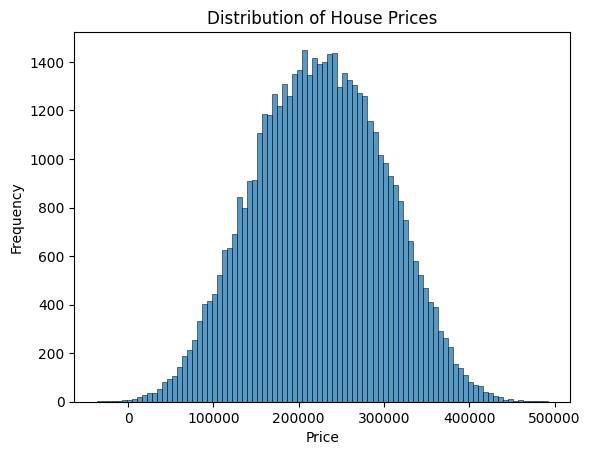

In [ ]:
#Step5 : EXPLORATORY DATA ANALYSIS (EDA)

#Price Distribution
sns.histplot(df["Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

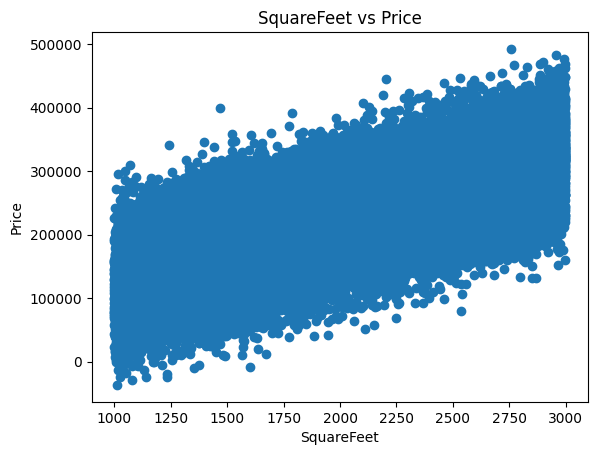

In [ ]:
#Numerical Features vs Price
#SquareFeet vs Price

plt.scatter(df["SquareFeet"],df["Price"])
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.title("SquareFeet vs Price")
plt.show()

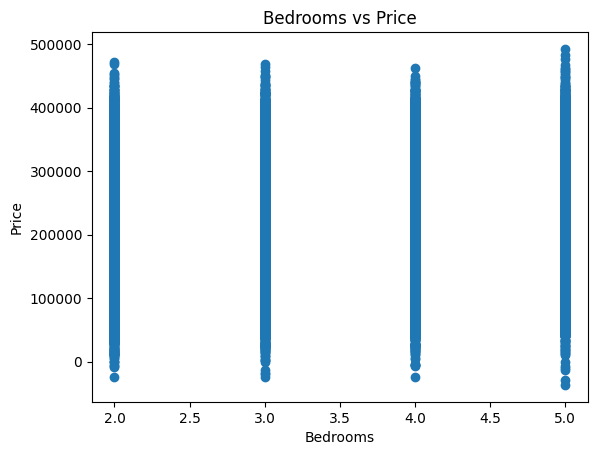

In [ ]:
#Bedrooms vs Price

plt.scatter(df["Bedrooms"],df["Price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.show()

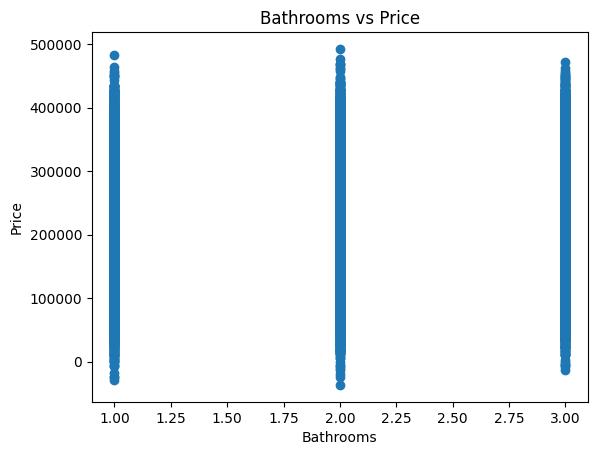

In [ ]:
#Bathrooms vs Price

plt.scatter(df["Bathrooms"],df["Price"])
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bathrooms vs Price")
plt.show()

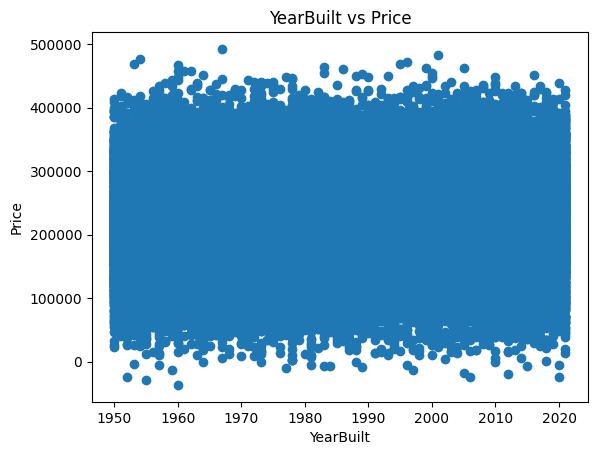

In [ ]:
#YearBuilt vs Price

plt.scatter(df["YearBuilt"],df["Price"])
plt.xlabel("YearBuilt")
plt.ylabel("Price")
plt.title("YearBuilt vs Price")
plt.show()

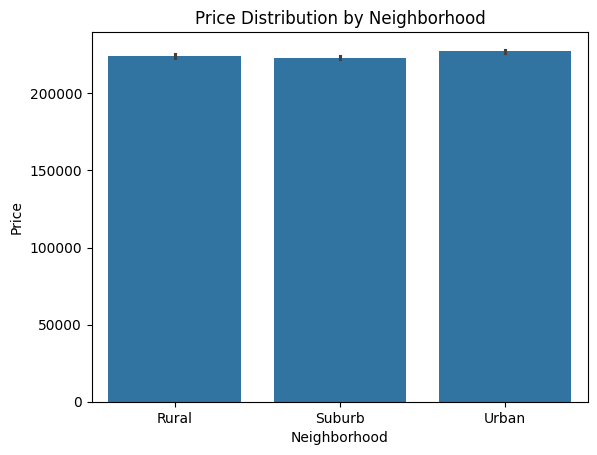

In [ ]:
#Categorical Features vs Price
#Neighborhood vs Price

sns.barplot(x="Neighborhood",y="Price",data=df)
plt.title("Price Distribution by Neighborhood")
plt.show()

In [ ]:
#Step6 : DATA PREPROCESSING
#One-Hot Encoding (Neighborhood)

df=pd.get_dummies(df,columns=["Neighborhood"])
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,True,False,False
1,2459,3,2,1980,195014.221626,True,False,False
2,1860,2,1,1970,306891.012076,False,True,False
3,2294,2,1,1996,206786.787153,False,False,True
4,2130,5,2,2001,272436.239065,False,True,False
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,True,False,False
49996,2854,2,2,1988,374507.656727,False,True,False
49997,2979,5,3,1962,384110.555590,False,True,False
49998,2596,5,2,1984,380512.685957,True,False,False


In [ ]:
#Step7 : FEATURE(x)-TARGET(y) SPLIT
#Feature

x=df.drop("Price",axis=1)
x

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,True,False,False
1,2459,3,2,1980,True,False,False
2,1860,2,1,1970,False,True,False
3,2294,2,1,1996,False,False,True
4,2130,5,2,2001,False,True,False
...,...,...,...,...,...,...,...
49995,1282,5,3,1975,True,False,False
49996,2854,2,2,1988,False,True,False
49997,2979,5,3,1962,False,True,False
49998,2596,5,2,1984,True,False,False


In [ ]:
#Target

y=df["Price"]
y

,Price
0,215355.283618
1,195014.221626
2,306891.012076
3,206786.787153
4,272436.239065
...,...
49995,100080.865895
49996,374507.656727
49997,384110.555590
49998,380512.685957


In [ ]:
#Step8 : TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#Step9 : MODEL CREATION AND TRAINING

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Step10 : PREDICTION

y_pred=model.predict(x_test)

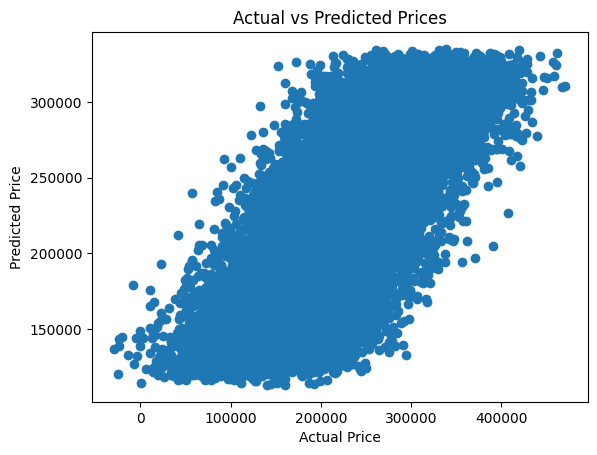

In [ ]:
#Step11 : MODEL EVALUATION
#Actual vs Predicted Plot

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
#Evaluation Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

MAE: 39823.50282669595
MSE: 2485271109.252313
RMSE: 49852.49351087981
R2 Score: 0.5659523562496389


In [ ]:
comparison_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
26247,244716.345651,188273.524379
35067,213071.025103,210971.335686
34590,53282.098098,130558.298426
16668,248908.682853,270256.844377
12196,263133.076957,255979.219973
...,...,...
14876,199065.837563,201199.023849
42772,193453.124726,180544.818045
37248,136779.763979,126796.778537
6246,196968.606959,224322.854523
